In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


Generate Cities List

In [2]:
lat_lngs = []
cities = []
np.random.seed(600)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

593

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country_id = []
counter_record = 0
counter_set = 0
for city in cities:
    weather_resp = requests.get(query_url + city).json()
    if counter_record < 50:
       counter_record = counter_record
    else:
        counter_set+=1
        counter_record = 0
    try:
        city_name.append(weather_resp['name'])
        lat.append(weather_resp['coord']['lat'])
        lng.append(weather_resp['coord']['lon'])
        max_temp.append(weather_resp['main']['temp_max'])
        humidity.append(weather_resp['main']['humidity'])
        cloudiness.append(weather_resp['clouds']['all'])
        wind_speed.append(weather_resp['wind']['speed'])
        date.append(weather_resp['dt'])
        country_id.append(weather_resp['sys']['country'][:])
        print(f"Processing Record {counter_record} of set {counter_set} | {city}")
        counter_record+=1
    except (KeyError, IndexError):
        print("City not found. Skipping...")

rd 35 of set 1 | port blair
Processing Record 36 of set 1 | mataura
Processing Record 37 of set 1 | chokurdakh
Processing Record 38 of set 1 | atuona
Processing Record 39 of set 1 | yellowknife
Processing Record 40 of set 1 | alta floresta
Processing Record 41 of set 1 | qaanaaq
Processing Record 42 of set 1 | saint-augustin
Processing Record 43 of set 1 | barcelona
City not found. Skipping...
Processing Record 44 of set 1 | butaritari
Processing Record 45 of set 1 | port alfred
Processing Record 46 of set 1 | bambous virieux
Processing Record 47 of set 1 | algiers
Processing Record 48 of set 1 | salalah
City not found. Skipping...
Processing Record 49 of set 1 | port victoria
Processing Record 0 of set 2 | lavrentiya
Processing Record 1 of set 2 | tiksi
Processing Record 2 of set 2 | east london
Processing Record 3 of set 2 | vao
Processing Record 4 of set 2 | torbay
Processing Record 5 of set 2 | guerrero negro
Processing Record 6 of set 2 | riyadh
Processing Record 7 of set 2 | prov

In [4]:
weather_data = pd.DataFrame({'City': city_name, 'Lat': lat, 'Long': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country_id, 'Date': date}) 
weather_data.to_csv(output_data_file, index=False)

In [5]:
weather_data.count()

City          545
Lat           545
Long          545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [6]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,79.00,66,44,4.05,US,1597687692
1,Kavieng,-2.57,150.80,81.75,79,9,10.45,PG,1597687753
2,Flin Flon,54.77,-101.86,60.80,72,75,12.75,CA,1597687753
3,Ushuaia,-54.80,-68.30,33.80,86,75,4.68,AR,1597687538
4,Broome,42.25,-75.83,78.01,68,75,6.93,US,1597687753
...,...,...,...,...,...,...,...,...,...
540,Moose Jaw,50.40,-105.53,78.80,41,75,6.93,CA,1597687841
541,Tres Arroyos,-38.37,-60.28,57.06,41,0,15.88,AR,1597687841
542,Yulara,-25.24,130.99,57.20,36,0,6.93,AU,1597687842
543,Ferrol,43.48,-8.24,71.60,78,75,8.05,ES,1597687842


Inspect the data and remove the cities where the humidity > 100%.

In [7]:
humidity_check = weather_data.describe()
humidity_check

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.160844,17.845156,69.395046,68.899083,49.047706,7.548385,1.597688e+09
std,34.235922,92.551982,15.160561,21.708778,36.951746,5.189410,7.240219e+01
min,-54.800000,-175.200000,30.990000,3.000000,0.000000,0.310000,1.597687e+09
25%,-10.620000,-66.830000,57.200000,57.000000,10.000000,3.560000,1.597688e+09
50%,21.430000,21.290000,71.600000,74.000000,45.000000,6.930000,1.597688e+09
75%,49.670000,102.500000,79.660000,85.000000,82.000000,10.290000,1.597688e+09
max,78.220000,179.320000,113.670000,100.000000,100.000000,35.080000,1.597688e+09


Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

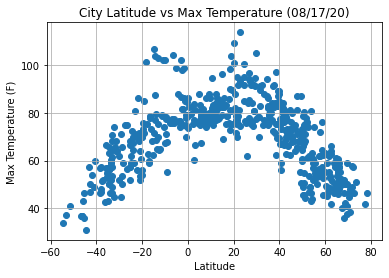

In [31]:
x_axis = weather_data['Lat']
y_axis = weather_data['Max Temp']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (%s)'% time.strftime("%m/%d/%y"))
plt.grid()
plt.savefig("output_data/fig1.png")
plt.show()

Above plot is a good representation of latitude on temperature. the temperature is rising higher as we move close to the equator'0 latitude' as should be.

Latitude vs Humidity

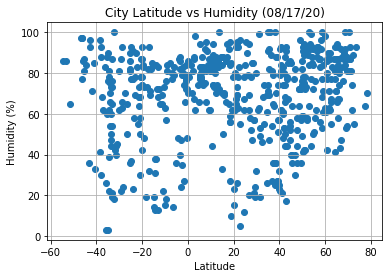

In [32]:
x_axis = weather_data['Lat']
y_axis = weather_data['Humidity']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%s)'% time.strftime("%m/%d/%y"))
plt.grid()
plt.savefig("output_data/fig2.png")
plt.show()

Latitude vs Cloudiness

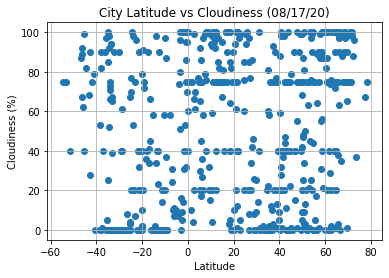

In [33]:
x_axis = weather_data['Lat']
y_axis = weather_data['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%s)'% time.strftime("%m/%d/%y"))
plt.grid()
plt.savefig("output_data/fig3.png")
plt.show()

Latitude vs Wind Speed

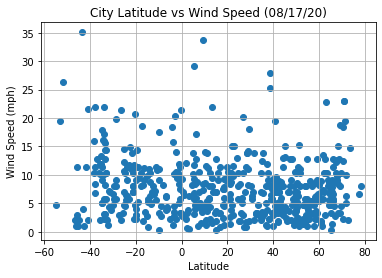

In [34]:
x_axis = weather_data['Lat']
y_axis = weather_data['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (%s)'% time.strftime("%m/%d/%y"))
plt.grid()
plt.savefig("output_data/fig4.png")
plt.show()

Linear Regression

In [12]:
columns = ['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
northern_hemisphere_data = weather_data.loc[weather_data["Lat"] > 0, columns]
northern_hemisphere_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,79.00,66,44,4.05,US,1597687692
2,Flin Flon,54.77,-101.86,60.80,72,75,12.75,CA,1597687753
4,Broome,42.25,-75.83,78.01,68,75,6.93,US,1597687753
10,College,64.86,-147.80,59.00,71,40,4.70,US,1597687754
12,Upernavik,72.79,-56.15,46.29,55,96,2.10,GL,1597687690
...,...,...,...,...,...,...,...,...,...
537,Son La,21.32,103.90,69.76,95,100,1.34,VN,1597687841
538,Muros,42.78,-9.06,70.00,93,75,6.93,ES,1597687841
539,Wukari,7.85,9.78,79.66,81,76,4.34,NG,1597687841
540,Moose Jaw,50.40,-105.53,78.80,41,75,6.93,CA,1597687841


In [13]:
columns = ['City', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
southern_hemisphere_data = weather_data.loc[weather_data["Lat"] < 0, columns]
southern_hemisphere_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kavieng,-2.57,150.80,81.75,79,9,10.45,PG,1597687753
3,Ushuaia,-54.80,-68.30,33.80,86,75,4.68,AR,1597687538
5,Busselton,-33.65,115.33,52.00,73,94,15.55,AU,1597687753
6,Vaini,-21.20,-175.20,71.60,73,90,10.29,TO,1597687754
7,Kaitangata,-46.28,169.85,37.00,77,67,1.01,NZ,1597687754
...,...,...,...,...,...,...,...,...,...
528,Katherine,-14.47,132.27,77.00,31,0,5.82,AU,1597687839
530,Saint-Joseph,-21.37,55.62,68.00,68,20,6.93,RE,1597687840
541,Tres Arroyos,-38.37,-60.28,57.06,41,0,15.88,AR,1597687841
542,Yulara,-25.24,130.99,57.20,36,0,6.93,AU,1597687842


Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared is: 0.5365715014357668
y = -0.53x + 91.37


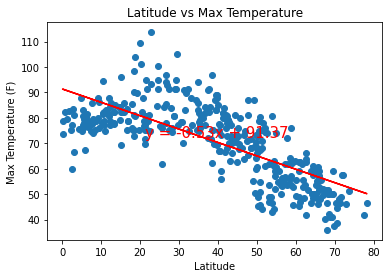

In [35]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Latitude vs Max Temperature')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Another good trend here. as we move further from the equator, the temperature keep droping. 



Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared is: 0.6109496242289827
y = 0.91x + 87.01


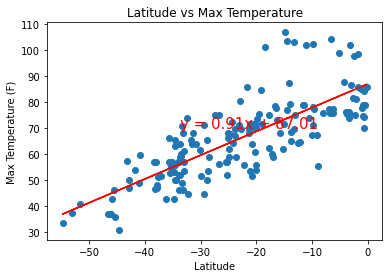

In [36]:
x_axis =southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-33.65, 70.00),fontsize=15,color="red")
plt.title('Latitude vs Max Temperature')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared is: 0.00120559651314258
y = 0.03x + 69.75


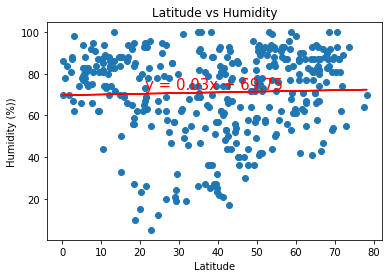

In [37]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Latitude vs Humidity')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared is: 0.006463643616350043
y = -0.14x + 60.96


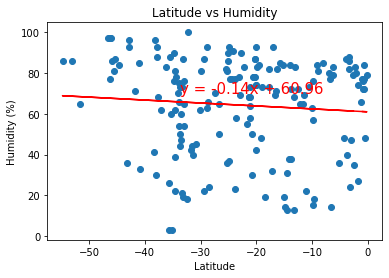

In [38]:
x_axis =southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-33.65, 70.00),fontsize=15,color="red")
plt.title('Latitude vs Humidity')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared is: 0.00025776072552374205
y = 0.03x + 52.17


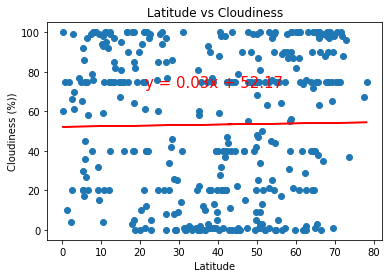

In [39]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.annotate(line_eq,(21.32, 72.46),fontsize=15,color="r")
plt.title('Latitude vs Cloudiness')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

There is no clear pattern or trends to follow in this plot. convetional wisdom dectate that, more clouds and rains should form near the equator line. however our data is wildely scatterd. may be we need thoudand of data points to see a clear picture here. 

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared is: 0.009496080074307899
y = -0.27x + 33.97


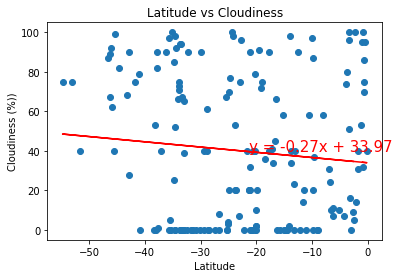

In [40]:
x_axis = southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.annotate(line_eq,(-21.32, 40),fontsize=15,color="r")
plt.title('Latitude vs Cloudiness')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared is: 2.4120673630061877e-05
y = 0.0x + 6.99


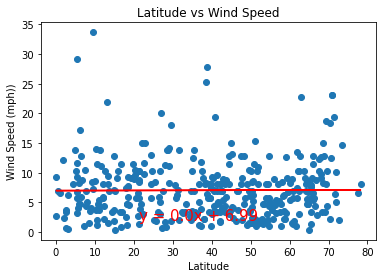

In [41]:
x_axis = northern_hemisphere_data['Lat']
y_axis = northern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.annotate(line_eq,(21.32, 1.97),fontsize=15,color="r")
plt.title('Latitude vs Wind Speed')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared is: 0.011404841355778647
y = -0.05x + 7.61


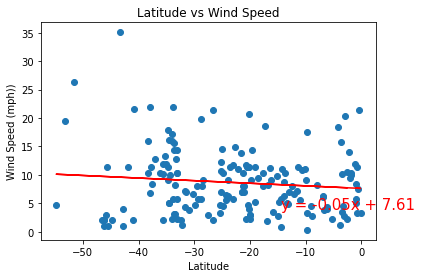

In [42]:
x_axis = southern_hemisphere_data['Lat']
y_axis = southern_hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.annotate(line_eq,(-14.47, 3.93),fontsize=15,color="r")
plt.title('Latitude vs Wind Speed')
print(f"R squared is: {rvalue**2}")
print(line_eq)
plt.show()